In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display
from sympy.utilities.lambdify import lambdify
from sympy import *

In [2]:
#kpc limits, visual guess based on the galaxy in the image chosen:
minkpc=0
maxkpc=25

#galaxy parameters
XXcut=2.4 #kpc for ngc5005...
rho00=.31e9 #Msun/kpc^2 for ngc5533

G = 4.30091e-6    #gravitational constant (kpc/solar mass*(km/s)^2)

#visual scaling
scale=.2e9 #the number of theoretical black holes each graphed dot actually presents, somewhat arbitrary but 
#should be a number that does't require the plotting too many or too few dots representing bh's
#units: scale = [#number of actual black holes / plotted dot]
kpctopixels=10 #visual scaling, varies depending on size of galaxy image (and actual size of galaxy)


#for number of black holes slider
Max=100 #max number of blackholes
best_M=.5*Max #default # of bh's for slider
stepN=.1*Max #step of # of bh's slider
Min=1# min # of black holes

#for blackhole mass slider:
minmass=.1 #solar masses, arbitrary
maxmass=3.7 #solar masses, just smaller then the smallest black hole ever discovered according to
#https://www.scientificamerican.com/gallery/the-smallest-known-black-hole/
start=.5*maxmass #default mass value for slider


#calculate the mass distribution on the galaxy using parametrs of similar galaxies (???)
r = symbols('r')
X=r/XXcut
Z = rho00/(X*(1+X)**2) #NFW (dark halo) density profile. I'm assuming Rs is cutoff radius. is this correct?
RHO=4*np.pi*r**2*Z #
RRR=integrate(RHO)
func = lambdify(r, RRR,'numpy') #returns a numpy-ready function
rr=np.linspace(minkpc,maxkpc,Max) #kpc
M = func(rr) #reprepresents the total mass [Msun] at each point in the array rr [kpc]
print(len(M))
print(len(rr))
N=M/start/scale #units: [tota mass Msun] / [Msun/blakhole] / [blackhole/dot] = dot ("number of dots") given the initial
#slider value of each black hole mass, start = .5*maxmass
N=np.rint(N) #convert array to integers
maxN=max(N) #select the max integer to be used for scaling later
length=len(N) #length of the array,
brackets=5 #five brackets, in other words, the mass distrubtion of the galaxy as a function of radius, divided into five
#sections. unfortunately this is the only parameter that can't be easily changed, unless most the following calculations
#be changed to for loops or something
brackarraysize=int(length/brackets) #determine how many elements each bracket array should have
bnum=np.linspace(1,brackets,brackets) #simply creating array [1,2... brackets]
r2o=np.rint(bnum*brackarraysize) #original r2 array, representing the upper kpc boundaries of each bracket
r1o=r2o+1-brackarraysize #original r1 array, representing the lower kpc boundaries of each bracket
r1=r1o*kpctopixels #converting to pixels so these numbers can actually be graphed appropriately relative to galaxy image
r2=r2o*kpctopixels
r1a,r1b,r1c,r1d,r1e=r1 #just attaching unique variable to each element in array
r2a,r2b,r2c,r2d,r2e=r2 #just attaching unique variable to each element in array
r1aa=np.rint(r1o-1) #unfortunately I have to do this bc python starts indexing at 0, not 1, so the numbers for calling the
#right positions in array have to be shifted by one
r2aa=np.rint(r2o-1)
r2ax,r2bx,r2cx,r2dx,r2ex=r2aa #same thing as before. annoying
r1ax,r1bx,r1cx,r1dx,r1ex=r1aa
r1ax=int(r1ax) #extra annoying. though these numbers are already integers, python doesn't recognize them as integers and
#they need to be integers to be called
r1bx=int(r1bx)
r1cx=int(r1cx)
r1dx=int(r1dx)
r1ex=int(r1ex)
r2ax=int(r2ax)
r2bx=int(r2bx)
r2cx=int(r2cx)
r2dx=int(r2dx)
r2ex=int(r2ex)
bracketa=N[r1ax:r2ax] #finally defining the upper and lower bounds (in pixels) of each bracket
bracketb=N[r1bx:r2bx]
bracketc=N[r1cx:r2cx]
brackete=N[r1ex:r2ex]
bracketd=N[r1dx:r2dx]

#fractions: the fraction of the average N value in each bracket as a percentage of the highest N value
Naf=np.mean(bracketa)/maxN 
Nbf=np.mean(bracketb)/maxN
Ncf=np.mean(bracketc)/maxN
Ndf=np.mean(bracketd)/maxN
Nef=np.mean(brackete)/maxN

#initially calculating how many dots should be projected within each bracket, based on N=Max=100
Na=Max*Naf 
Nb=Max*Nbf
Nc=Max*Ncf
Nd=Max*Ndf
Ne=Max*Nef

#calculate # of dots to be plotted within each bracket
#it's important to calculate r's and angle arrays here outside the plotted function (cell below), otherwise, python with
#plot new positions of the dots every time a slider values changes
raa = np.random.uniform(r1a,r2a,int(Max)) 
rbb = np.random.uniform(r1b,r2b,int(Max))
rcc = np.random.uniform(r1c,r2c,int(Max))
rdd = np.random.uniform(r1d,r2d,int(Max))
ree = np.random.uniform(r1e,r2e,int(Max))

angleaa=np.random.uniform(0,2*np.pi,int(Max)) #angle 0 to 360 degrees for fulle circle (donut) for each bracket
anglebb=np.random.uniform(0,2*np.pi,int(Max))
anglecc=np.random.uniform(0,2*np.pi,int(Max))
angledd=np.random.uniform(0,2*np.pi,int(Max))
angleee=np.random.uniform(0,2*np.pi,int(Max))

100
100


In [3]:
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display

w=3970 #width of the square image
h=w
#center of galaxy:
c_x=w/2
c_y=h/2.2

#inner/outer radii, judging by eye
r1=.16*w
r2=.28*w

def f(arraysize,Mbh):
    
    
    #fractions: now changing the number of dots plottd within each bracket, which changes as the slider 
    #variable ("arraysize") changes
    Na=int(arraysize*Naf)
    Nb=int(arraysize*Nbf)
    Nc=int(arraysize*Ncf)
    Nd=int(arraysize*Ndf)
    Ne=int(arraysize*Nef)
    
    #and trim to the first x elements of the pre-caclated radius arrays for each bracket
    ra = raa[:Na]
    rb = rbb[:Nb]
    rc = rcc[:Nc]
    rd = rdd[:Nd]
    re = ree[:Ne]
    #and trim to the first x elements of the pre-caclated angle arrays for each bracket
    anglea=angleaa[:Na] 
    angleb=anglebb[:Nb]
    anglec=anglecc[:Nc]
    angled=angledd[:Nd]
    anglee=angleee[:Ne]
    
    #plot for each bracket, two equations for each bracket
    ya=c_y+ra*np.sin(anglea) #y coordinates
    xa=c_x+ra*np.cos(anglea) #x coordinates
    yb=c_y+rb*np.sin(angleb) #y coordinates
    xb=c_x+rb*np.cos(angleb) #x coordinates
    yc=c_y+rc*np.sin(anglec) #y coordinates
    xc=c_x+rc*np.cos(anglec) #x coordinates
    yd=c_y+rd*np.sin(angled) #y coordinates
    xd=c_x+rd*np.cos(angled) #x coordinates
    ye=c_y+re*np.sin(anglee) #y coordinates
    xe=c_x+re*np.cos(anglee) #x coordinates

    img = plt.imread("A_spiral_snowflake.jpg") #import special snowflake ngc 6814, which has visual diameter about 27.6kpc
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    f.set_figheight(15)
    f.set_figwidth(30)
    
    #below: changing the physical size of the plotted dots as the bh mass slider changes. the if else statement is fancy
    #but not necessary
    
    
    #WIP: getting so that the halo component/total RC curve updates as bh widgets update
   
    Me=Mbh*arraysize*scale*M
    V = np.sqrt(Me*G/XXcut) #is it rc or just r???? units: km/s
    
    
    
    Mbh=1.5*Mbh #judging by eye
    if .1<=Mbh<1:
        Mbh=Mbh**1.5
    elif 1<=Mbh<2:
        Mbh=Mbh**2
    else:
        Mbh=Mbh**3 #display size of each marker
        
    #ax1.plot(c_x+r1c*10,c_y,color="pink",marker='x')
    ax1.scatter(xa,ya,color="r",marker='o',s=Mbh)
    ax1.scatter(xb,yb,color="r",marker='o',s=Mbh)
    ax1.scatter(xc,yc,color="r",marker='o',s=Mbh)
    ax1.scatter(xd,yd,color="r",marker='o',s=Mbh)
    ax1.scatter(xe,ye,color="r",marker='o',s=Mbh)
   
    ax1.imshow(img)
    ax1.axis('off')
    ax2.plot(rr,V)
    ax2.set_xlim([minkpc, maxkpc])
    ax2.set_ylim([0, 10e7])
    
style = {'description_width': 'initial'}
layout = {'width':'600px'}

################################
######## Define Sliders ########
################################

#mass of each black hole
Mbh = FloatSlider(min=minmass, max=maxmass, step=minmass, 
                value=start,
                description='Mass of each lil black holes [Msun]', 
                readout= True,
                readout_format='.1f', 
                orientation='horizontal', 
                style=style, layout=layout)

#number of projected black dots slider
arraysize = FloatSlider(min=Min, max=Max, step=stepN, 
                value=best_M, 
                description='Number of lil black holes multiplied by scale %.0e'%scale, 
                readout= True,
                readout_format='.2d', 
                orientation='horizontal', 
                style=style, layout=layout)



def interactive_plot(f):
    interact = interactive(f, arraysize=arraysize,Mbh=Mbh,continuous_update=False)
    return interact
VBox([interactive_plot(f)])

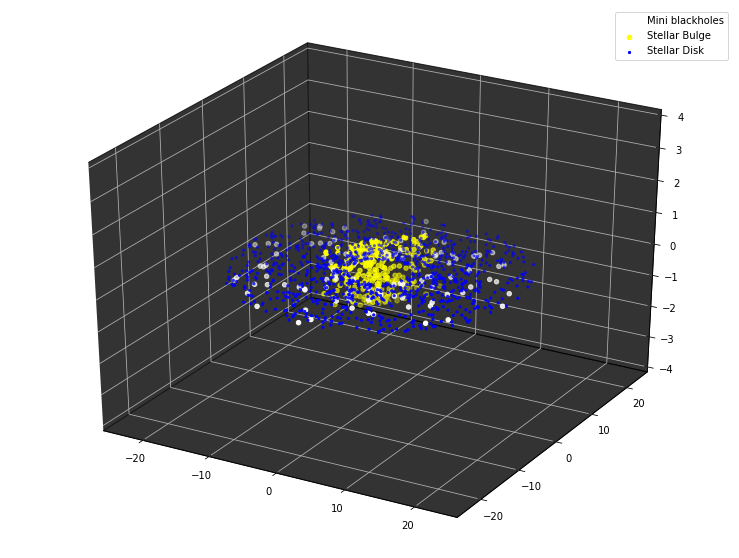

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

N=1000
X=25 #kpc
Y=X
Z=4 #kpc

#plotting disk
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yd=r*np.sin(angle) #y coordinates
xd=r*np.cos(angle) #x coordinates
zd=0

#plotting bulge
N=250
r2b=Z
r1b=-Z
rb = np.random.uniform(r1b,r2b,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yb=rb*np.sin(angle)+rb*np.cos(angle) #y coordinates
xb=rb*np.cos(angle) #x coordinates
r1bb=-Z/4
r2bb=-r1
rbb = np.random.uniform(r1bb,r2bb,N)
zb=np.linspace(-1,1,N)

#plotting black holes
N=100
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
ybh=r*np.sin(angle) #y coordinates
xbh=r*np.cos(angle) #x coordinates
zbh=0



# create the figure
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xbh, ybh, zbh, color='white',label='Mini blackholes',zorder=1)
ax.scatter3D(yb, yb, zb, color='yellow',label='Stellar Bulge',zorder=2)
ax.scatter3D(xd, yd, zd, color='blue',marker='.',label='Stellar Disk',zorder=3)
ax.set_xlim((-X,X))
ax.set_ylim((-Y,Y))
ax.set_zlim((-Z,Z))
ax.legend()
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.w_xaxis.set_pane_color((0, 0, 0, .8))
ax.w_yaxis.set_pane_color((0, 0, 0, .8))
ax.w_zaxis.set_pane_color((0, 0, 0, .8))

plt.show()